<a href="https://colab.research.google.com/github/fatema373/Remove-EG-logo/blob/main/Updated_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sorry for the interruption. I utilized a custom approach for the task and used pre-saved weights. This required running the code cell each time you open the notebook to detect objects and save their coordinates in a text file. Consequently, I removed some helper functions that were no longer necessary.**


In [1]:
!git clone https://github.com/fatema373/Remove-EG-logo.git

Cloning into 'Remove-EG-logo'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 72 (delta 21), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (72/72), 21.25 MiB | 19.71 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [2]:
!unzip -q /content/Remove-EG-logo/EFG.zip -d /content

you have to restart session after installation

In [3]:
!pip install yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.9/757.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 k

you have to restart session after installatioin

In [1]:
!pip install -r /content/Remove-EG-logo/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


### Imports


In [1]:
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import shutil
import cv2
import os
import torch
from yolov5 import detect

## Helper functions

In [2]:
def preprocess_image(image):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Convert to floating point
    pixels = np.float32(pixels)
    return pixels

def get_dominant_colors(pixels, k=3):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)

    # Retrieve the dominant colors
    colors = kmeans.cluster_centers_

    # Convert the pixel values to integer
    return colors.astype(int)

def display_dominant_colors(dominant_colors):
    # Create a blank white image
    bar = np.zeros((50, 300, 3), dtype=np.uint8)
    startX = 0

    # For each dominant color, draw a rectangle on the blank image
    for color in dominant_colors:
        endX = startX + (300 // len(dominant_colors))
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color.astype(int).tolist(), -1)
        startX = endX

    # Display the image
    plt.imshow(bar)
    return

def show_img(image):
  plt.imshow(image)
  plt.show()

In [3]:
def delete_logo(in_img_path, out_img_path):
    # Read the image
    image = cv2.imread(in_img_path)
    image = cv2.resize(image, (640, 640))
    cv2.imwrite(in_img_path, image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load the YOLOv5 model
    model_path = '/content/EFG/weights/train/yolov5s_results2/weights/best.pt'
    model = torch.load(model_path)

    # Load model from YOLOv5's utils
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)
    results = model(in_img_path)
    results.save(save_dir='/content/EFG/result/')

    # Extract detection data
    inference = results.pandas().xyxy[0]

    # Ensure there is at least one detection
    if not inference.empty:
        # Iterate through each detected object and process the ROI
        for index, row in inference.iterrows():
            x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])

            # Crop the region of interest (ROI) from the image using the bounding box coordinates
            ROI = image[y1:y2, x1:x2]

            # Preprocess the image to get pixels
            preprocessed_image = preprocess_image(ROI)

            # Get dominant colors
            num_colors = 5
            dominant_colors = get_dominant_colors(pixels=preprocessed_image, k=num_colors)
            display_dominant_colors(dominant_colors)

            # Find the lightest color
            lightenedcolor = [sum(color) for color in dominant_colors]
            lightest_color = dominant_colors[np.argmax(lightenedcolor)]

            # Replace ROI with the lightest dominant color
            ROI[:, :] = lightest_color.astype(int)
            image[y1:y2, x1:x2] = ROI

            # Extend the bounding box coordinates by the specified extension(To blure logo with surrounding pixeles)
            extension=50
            x1_ext = max(0, x1 - extension)
            y1_ext = max(0, y1 - extension)
            x2_ext = min(image.shape[1], x2 + extension)
            y2_ext = min(image.shape[0], y2 + extension)

            # Crop the extended region of interest (ROI) from the image
            ROI_ext = image[y1_ext:y2_ext, x1_ext:x2_ext]

            # Apply Gaussian filter to the extended region
            ROI_filtered = cv2.GaussianBlur(ROI_ext, (15, 15), 0)

            # Replace the original ROI in the image with the filtered ROI
            image[y1_ext:y2_ext, x1_ext:x2_ext] = ROI_filtered
    else:
      print("YOLO failed to detect the logo in this image.")
    # Ensure the output directory exists
    if not os.path.exists(out_img_path):
        os.makedirs(out_img_path)

    # Write the image to the output path
    output_image_path = os.path.join(out_img_path, os.path.basename(in_img_path))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_image_path, image)
    print(f"Processed image saved to {output_image_path}")




## Test images

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cPQ6kWGIiH7WqtlNYtsR")
project = rf.workspace("cairo-university-vqdin").project("fine_tuned")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fine_tuned-1 in yolov5pytorch:: 100%|██████████| 296/296 [00:00<00:00, 7691.16it/s]


In [5]:
input_imag_path = '/content/fine_tuned-1/test/images/11_jpg.rf.c7cb800df15efdd1394b5270652f2939.jpg'
out_path = '/content/EFG/out_path'
delete_logo(input_imag_path,out_path)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-5-22 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 233 layers, 7255094 parameters, 0 gradients
Adding AutoShape... 
WARNING ⚠️ NMS time limit 0.550s exceeded
Saved 1 image to /content/EFG/result
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Processed image saved to /content/EFG/out_path/11_jpg.rf.c7cb800df15efdd1394b5270652f2939.jpg


In [6]:
input_imag_path = '/content/fine_tuned-1/test/images/57_jpg.rf.960573249975f647dd902a042fe48d87.jpg'
out_path = '/content/EFG/out_path'
delete_logo(input_imag_path,out_path)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-22 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 233 layers, 7255094 parameters, 0 gradients
Adding AutoShape... 
Saved 1 image to /content/EFG/result2
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Processed image saved to /content/EFG/out_path/57_jpg.rf.960573249975f647dd902a042fe48d87.jpg


In [7]:
input_imag_path = '/content/fine_tuned-1/test/images/25_jpg.rf.1e4847356e1fdb85287c5ab4d5a4fd59.jpg'
out_path = '/content/EFG/out_path'
delete_logo(input_imag_path,out_path)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-22 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 233 layers, 7255094 parameters, 0 gradients
Adding AutoShape... 
Saved 1 image to /content/EFG/result3
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Processed image saved to /content/EFG/out_path/25_jpg.rf.1e4847356e1fdb85287c5ab4d5a4fd59.jpg


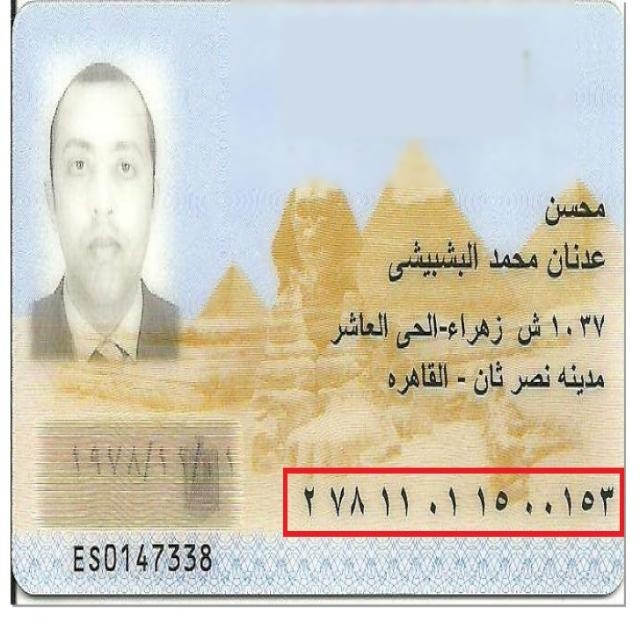

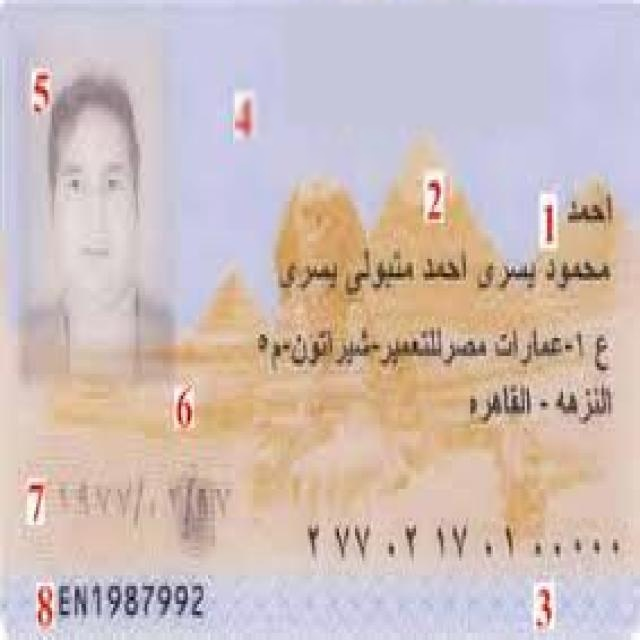

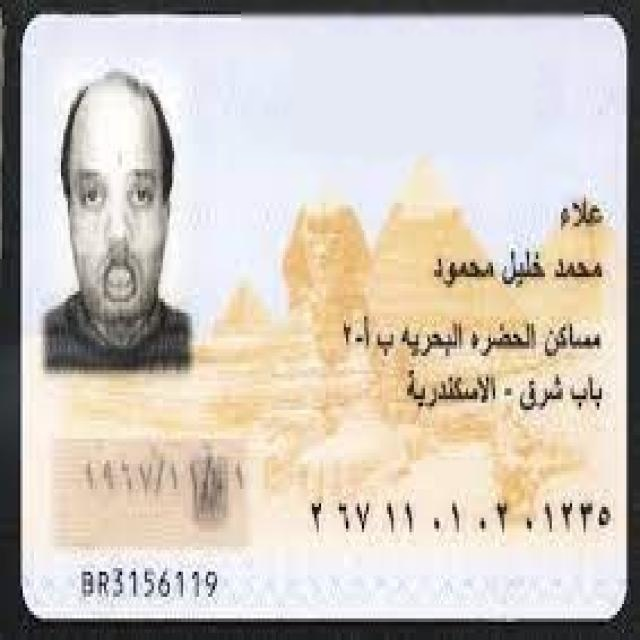

In [12]:
from IPython.display import display, Image

def display_images_in_folder(folder_path):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Display each image in the folder
    for image_file in files:
        image_path = os.path.join(folder_path, image_file)
        display(Image(filename=image_path))

folder_path = '/content/EFG/out_path'
display_images_in_folder(folder_path)